# 3D Wannier test

In [2]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Lattice order test

In [ ]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([3], dtype=int),
    band=1,
    dim=3,
    avg=1 / 2,
    sparse=True,
    symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimize(dvr, E, W, parity)
V = interaction(dvr, U, W, parity)
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_{i+1}_i = ', np.real(mu))
    print(f't_{i+1}_ij =', abs(t))
print('U_i =', abs(V))


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
lattice: lattice shape is square
lattice: Full lattice sizes: [3]
lattice: lattice constants: [1.52]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 20 20] is set.
DVR: R0=[4.52 3.   7.2 ]w is set.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 3 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.48s.
H_solver: eigenstates memory usage:  0.31 MiB.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 3 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.40s.
H_solver: eigenstates memory usage:  0.30 MiB.
Single band optimization time: 0.0006279945373535156s.
Single band interaction time: 0.23006415367126465s.
mu_1_i 

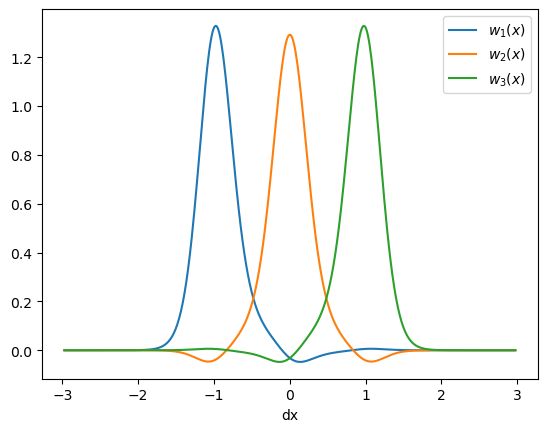

In [ ]:
import matplotlib.pyplot as plt

mu = 0
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0.25])
# c = int(x[0] / dvr.dx[0])
# plt.xticks(np.arange(c, -c + 1, 1.0))
plt.plot(x / dvr.lc[0],
         fix_phase(
             wannier_func(dvr, W[mu], U[mu], parity[mu],
                          [x, y, z]).reshape(-1, dvr.Nsite)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
# plt.plot(x / dvr.dx[0],
#          positify(
#              wannier_func(dvr, W[0], U[0], parity[0],
#                           [x, y, z]).reshape(-1, dvr.Nsite))**4,
#          label=tuple('$|w_{}(x)|^4$'.format(i + 1) for i in range(dvr.Nsite)))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()


In [ ]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(
    N,
    R0,
    lattice=np.array([8], dtype=int),
    band=1,
    dim=3,
    avg=1 / 2,
    sparse=True,
    # homogenize=True,
    symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
V = interaction(dvr, U, W, parity)
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000m
lattice: Full lattice sizes: [8 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[55 20 20] is set.
DVR: R0=[8.32 3.   7.2 ]w is set.
H_op: n=[55 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[55 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.10s.
H_solver: eigenstates memory usage: 1.51 MiB.
H_op: n=[55 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[55 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Ga

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


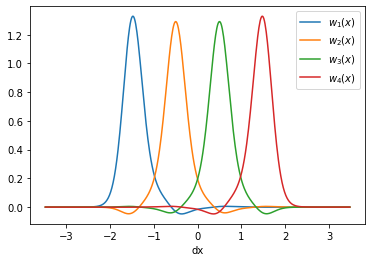

In [ ]:
import matplotlib.pyplot as plt

mu = 0
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0.25])
plt.plot(x / dvr.lc[0],
         positify(
             wannier_func(dvr, W[mu], U[mu], parity[mu],
                          [x, y, z]).reshape(-1, dvr.Nsite)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

### Reproduce PRA

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=55kHz w=707m
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.15983027 1.41442716 1.15983027]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[23 20 20] is set.
DVR: R0=[3.57991513 3.         7.2       ]w is set.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.36s.
H_solver: eigenstates memory usage: 0.32 MiB.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian operator constructed.
H_solver: diagonalize sparse

Text(0, 0.5, 'E (Hz)')

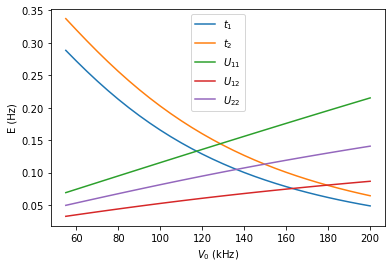

In [ ]:
from wannier import *
import numpy as np
from positify import positify
import matplotlib.pyplot as plt

N = 20
ax = 820
ay = 1000
R0 = np.array([3, 3, 7.2])
V_list = np.arange(55, 205, 5)

t_list = np.array([]).reshape(0, 2)
U_list = np.array([]).reshape(0, 3)
for V0 in V_list:
    dvr = Wannier(N,
                  R0,
                  lattice=np.array([2], dtype=int),
                  lc=(ax, ay),
                  trap=(V0, 707, 2.17E3),
                  atom=86.9,
                  laser=707,
                  ascatt=95,
                  band=2,
                  avg=1,
                  dim=3,
                  sparse=True,
                  symmetry=True)

    E, W, parity = eigen_basis(dvr)

    A, U = optimization(dvr, E, W, parity)
    t_sb = np.array([])
    for i in range(dvr.bands):
        mu = np.diag(A[i])  # Diagonals are mu_i
        t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
        print(f'mu_i,{i+1} = ', np.real(mu))
        print(f't_ij,{i+1} =', abs(t))
        t_sb = np.append(t_sb, abs(t[0, 1]))
    t_list = np.append(t_list, t_sb[None], axis=0)
    V = interaction(dvr, U, W, parity)
    print('U_i =', abs(V))
    U_list = np.append(U_list, abs(V[[0, 0, 1], [0, 1, 1], 0][None]), axis=0)

plt.plot(V_list, t_list, label=('$t_1$', '$t_2$'))
plt.plot(V_list, U_list, label=('$U_{{11}}$', '$U_{{12}}$', '$U_{{22}}$'))
plt.legend()
plt.xlabel('$V_0$ (kHz)')
plt.ylabel('E (Hz)')

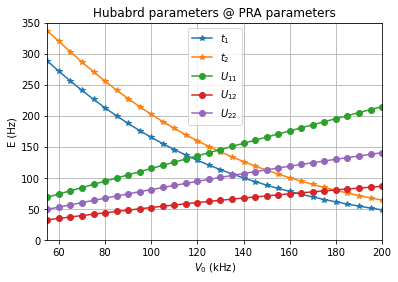

In [ ]:
plt.plot(V_list, t_list * 1E3, '*-', label=('$t_1$', '$t_2$'))
plt.plot(V_list, U_list * 1E3, 'o-', label=('$U_{{11}}$', '$U_{{12}}$', '$U_{{22}}$'))
plt.legend()
plt.title('Hubabrd parameters @ PRA parameters')
plt.xlabel('$V_0$ (kHz)')
plt.ylabel('E (Hz)')
plt.ylim([0, 350])
plt.xlim([55, 200])
plt.grid()
plt.savefig('Hubbard.png')

### Tunneling vs spacing

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=100kHz w=707nm
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.13154173 1.41442716 1.13154173]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[23 20 20] is set.
DVR: R0=[3.56577086 3.         7.2       ]w is set.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.39s.
H_solver: eigenstates memory usage: 0.32 MiB.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian operator constructed.
H_solver: diagonalize spar

Text(0, 0.5, 'E (Hz)')

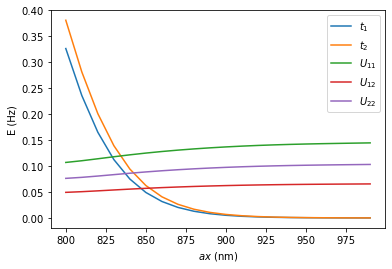

In [ ]:
from wannier import *
import numpy as np
from positify import positify
import matplotlib.pyplot as plt

N = 20
# ax = 820
ay = 1000
V0 = 100
R0 = np.array([3, 3, 7.2])
ax_list = np.arange(800, 1000, 10)

t_list = np.array([]).reshape(0, 2)
U_list = np.array([]).reshape(0, 3)
for ax in ax_list:
    dvr = Wannier(N,
                  R0=R0,
                  lattice=np.array([2], dtype=int),
                  lc=(ax, ay),
                  trap=(V0, 707, 2.17E3),
                  atom=86.9,
                  laser=707,
                  ascatt=95,
                  band=2,
                  avg=1,
                  dim=3,
                  sparse=True,
                  symmetry=True)

    E, W, parity = eigen_basis(dvr)

    A, U = optimization(dvr, E, W, parity)
    t_sb = np.array([])
    for i in range(dvr.bands):
        mu = np.diag(A[i])  # Diagonals are mu_i
        t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
        print(f'mu_i,{i+1} = ', np.real(mu))
        print(f't_ij,{i+1} =', abs(t))
        t_sb = np.append(t_sb, abs(t[0, 1]))
    t_list = np.append(t_list, t_sb[None], axis=0)
    V = interaction(dvr, U, W, parity)
    print('U_i =', abs(V))
    U_list = np.append(U_list, abs(V[[0, 0, 1], [0, 1, 1], 0][None]), axis=0)

plt.plot(ax_list, t_list, label=('$t_1$', '$t_2$'))
plt.plot(ax_list, U_list, label=('$U_{{11}}$', '$U_{{12}}$', '$U_{{22}}$'))
plt.legend()
plt.xlabel('$ax$ (nm)')
plt.ylabel('E (Hz)')

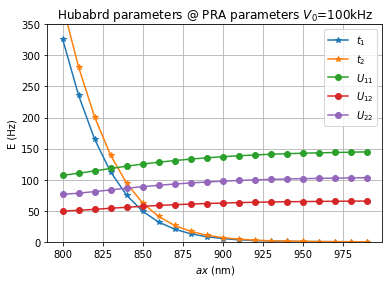

In [ ]:
plt.plot(ax_list, t_list * 1E3, '*-', label=('$t_1$', '$t_2$'))
plt.plot(ax_list,
         U_list * 1E3,
         'o-',
         label=('$U_{{11}}$', '$U_{{12}}$', '$U_{{22}}$'))
plt.legend()
plt.title(f'Hubabrd parameters @ PRA parameters $V_0$={V0}kHz')
plt.xlabel('$ax$ (nm)')
plt.ylabel('E (Hz)')
plt.ylim([0, 350])
# plt.yscale('log')
# plt.xlim([55, 200])
plt.grid()
plt.savefig('Hubbard.png')

### Trap plots

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 20 20] is set.
DVR: R0=[3.76 3.   7.2 ]w is set.


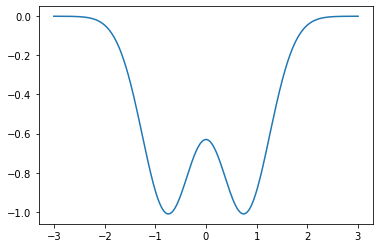

In [ ]:
import matplotlib.pyplot as plt
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([2], dtype=int),
              band=1,
              dim=3,
              avg=1 / 2,
              sparse=True,
              symmetry=True)

x = np.linspace(-dvr.R0[0] * 0.8, dvr.R0[0] * 0.8, 500)
V = dvr.Vfun(x, 0, 0)

plt.plot(x, V)

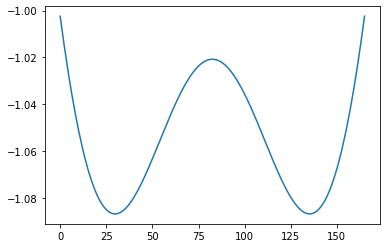

In [ ]:
plt.plot(V[V < -1])

The trap depth difference between edges and bulks are $\sim 1\%$.

## Spectrum of higher levels

In [10]:
from wannier import *
import numpy as np
from positify import positify
import itertools

N = 20
V0 = 100
ax = 820
ay = 1000
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0,
              lattice=np.array([1], dtype=int),
              dim=3,
              avg=1 / 2,
              sparse=True,
              symmetry=True)

dvr.p = np.zeros(dim, dtype=int)
dvr.p[dvr.nd] = 1  # [1 1 1] sector
# BUild all sectors
p_tuple = [[1, -1]]  # x direction
# y direction
if dvr.lattice.size > 1 and not any(dvr.lattice == 1):
    p_tuple.append([1, -1])
else:
    p_tuple.append([1])
p_tuple.append([1, -1])  # z direction
p_list = list(itertools.product(*p_tuple))

k = 4 * dvr.Nsite

E = np.array([])
W = []
parity = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    E, W, parity = add_sector(p, dvr, E, W, parity)  #  [1 1] sector


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000m
lattice: Full lattice sizes: [1 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
H_op: n=[20 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[20 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.22s.
H_solver: eigenstates memory usage: 0.28 MiB.
H_op: n=[20 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[20 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gauss